In [240]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
import os
import sklearn
import pickle

In [241]:
#load and read csv file
data_module= pd.read_csv("Position_Salaries.csv")
data_module.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [242]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [243]:
data_module.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [244]:
# Imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
data_module= data_module[['Level','Salary']]

In [245]:
data_module.dtypes

Level     int64
Salary    int64
dtype: object

In [246]:
data_module.isnull().sum()

Level     0
Salary    0
dtype: int64

In [247]:
#split dataset into train and test
train,test=train_test_split(data_module,test_size=0.3,random_state=0)
print("train",train.shape)
print("test",test.shape)

train (7, 2)
test (3, 2)


In [248]:
#save datafile into csv file
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index= False)

In [249]:
train_module= pd.read_csv("train.csv")
train_module.head()

,Level,Salary
0,10,1000000
1,2,50000
2,7,200000
3,8,300000
4,4,80000


In [250]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_module,test_size=0.3,random_state=0)

In [251]:
x_train= train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values

In [252]:
print("x train data:",x_train.shape)
# print(x_train)
print("y train data:",y_train.shape)

x train data: (4, 1)
y train data: (4,)


In [253]:
#feature scalling on training set
sc_x = StandardScaler()
sc_y = StandardScaler()
# x_train= sc_x.fit_transform(x_train)
x_train = sc_x.fit_transform(x_train.reshape(-1, 1) )
y_train = sc_y.fit_transform(y_train.reshape(-1, 1) )
# y_train= sc_y.fit_transform(y_train)

In [254]:
regressor= SVR(kernel='rbf')
regressor.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [255]:
y_pred_tr=regressor.predict(x_train)
y_pred_tr

array([-0.04619394,  0.39889517, -0.70972525, -0.61917209])

In [256]:
Accuracy = sklearn.metrics.r2_score(y_train,y_pred_tr)*100
print(Accuracy)

58.533082098876065


In [257]:
file = open("train_data.pkl",'wb')
pickle.dump(regressor,file)

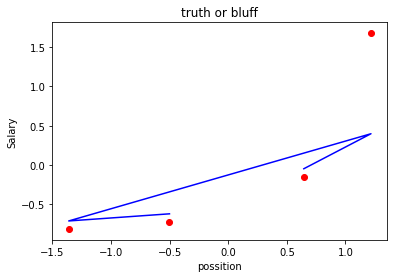

In [258]:
#visualizing the SVR result
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title("truth or bluff")
plt.xlabel("possition")
plt.ylabel("Salary")
plt.show()

In [259]:
cv_data.to_csv('cv_data.csv',index=False)

In [260]:
# loading cross validation dataset file
cv_data = pd.read_csv('cv_data.csv')
cv_data.head()

,Level,Salary
0,6,150000
1,7,200000
2,2,50000


In [261]:
cv_data_x= cv_data.iloc[:,:-1].values
cv_data_y=cv_data.iloc[:,1].values

In [262]:
print("cross validate data x",cv_data_x.shape)
print("cross validate data y",cv_data_y.shape)

cross validate data x (3, 1)
cross validate data y (3,)


In [263]:
#feature scalling on cross-validate data
sc_cv_x= StandardScaler()
sc_cv_y= StandardScaler()
cv_data_x= sc_x.fit_transform(cv_data_x.reshape(-1,1))
# cv_data_x= sc_x.fit_transform(cv_data_x)
# cv_data_x= sc_x.fit_transform(cv_data_y)
cv_data_y=sc_y.fit_transform(cv_data_y.reshape(-1,1))

In [264]:
y_pred_cv=regressor.predict(cv_data_x)
y_pred_cv

array([-0.20457543,  0.20831523, -0.70634509])

In [265]:
# regressor= SVR(kernel='rbf')
# regressor.fit(x_train,y_train)

In [266]:
Accuracy = sklearn.metrics.r2_score(cv_data_y,y_pred_cv)*100
print(Accuracy)

54.655448535230434


In [267]:
file1= open("train_data.pkl",'rb')
regressor=pickle.load(file1)

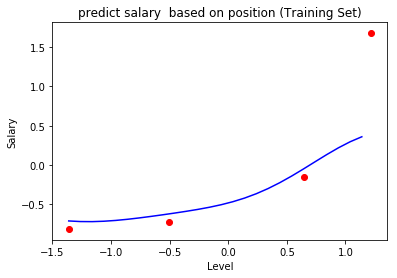

In [268]:
# visualizing the training set result
x_grid=np.arange(min(x_train),max(x_train),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title('predict number of bikes getting shared (Training Set)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()


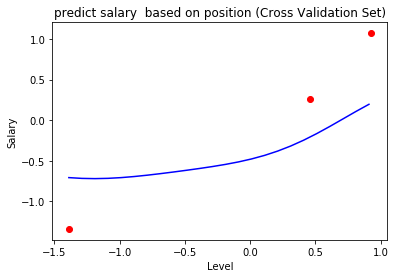

In [269]:
# visualizing the testing set result
x_grid=np.arange(min(cv_data_x),max(cv_data_x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(cv_data_x,cv_data_y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title('predict number of bikes getting shared (Training Set)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()